In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
import sys
import pickle as pkl
import pickle
import joblib
import itertools
from math import ceil 
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder

Using TensorFlow backend.


In [2]:
# load  preprocessed dataset
data=pd.read_csv("train.csv")

data_new=data.values

X=data_new[:,:-1] 
Y=data_new[:,-1]

#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30,random_state=7)

In [ ]:
##############prediction on synthesized test attacks##############

In [4]:
#predict on synthesized Slow httptest DoS attack

test_data=pd.read_csv('ShttpAA1.csv')
test_data_new=test_data.values

X_test1=test_data_new[:,:-1]
Y_test1=test_data_new[:,-1]


#predict on synthesized Slowloris DoS attack

test_data2=pd.read_csv('SlowAA1.csv')
test_data_new2=test_data2.values

X_test2=test_data_new2[:,:-1] 
Y_test2=test_data_new2[:,-1]

In [5]:
# load model from file
model2 = pickle.load(open("TPOT.dat", "rb"))

Y_pred1 = model2.predict(X_test1)
print("Testing Accuracy for Slow httptest= ", model2.score(X_test1,Y_test1)*100)
print("Classification Report for Slow httptest:-\n",classification_report(Y_test1,Y_pred1))

Testing Accuracy for Slow httptest=  69.13220733838091
Classification Report for Slow httptest:-
               precision    recall  f1-score   support

         0.0       0.32      1.00      0.48       244
         1.0       1.00      0.64      0.78      1473

    accuracy                           0.69      1717
   macro avg       0.66      0.82      0.63      1717
weighted avg       0.90      0.69      0.74      1717



E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
# load model from file
model2 = pickle.load(open("TPOT.dat", "rb"))

Y_pred2 = model2.predict(X_test2)
print("Testing Accuracy for Slowloris= ", model2.score(X_test2,Y_test2)*100)
print("Classification Report for Slowloris:-\n",classification_report(Y_test2,Y_pred2))

Testing Accuracy for Slowloris=  100.0
Classification Report for Slowloris:-
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       244
         1.0       1.00      1.00      1.00       268

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
# Compute confusion matrix for Slow httptest
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
cm1 = confusion_matrix(Y_test1, Y_pred1)
print("Confusion matrix for Slow httptest:")
print(cm1)
tn = cm1[0][0]
fp = cm1[0][1]
fn = cm1[1][0]
tp = cm1[1][1]
print("\nTotal number of true positives(Attack identified as Attack))", tp)
print("Total number of false negatives (Attack identified as Benign)",fn)
print("Total number of false positives(Benign identified as Attack)",fp)
print("Total number of true negatives (Benign identified as Benign)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn,"\n")

Confusion matrix for Slow httptest:
[[244   0]
 [530 943]]

Total number of true positives(Attack identified as Attack)) 943
Total number of false negatives (Attack identified as Benign) 530
Total number of false positives(Benign identified as Attack) 0
Total number of true negatives (Benign identified as Benign) 244
Real positives: 1473
Real negatives: 244
Predicted positives: 943
Predicted negatives: 774 



In [8]:
# Compute confusion matrix for Slowloris
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
cm2 = confusion_matrix(Y_test2, Y_pred2)
print("Confusion matrix for Slowloris:")
print(cm2)
tn = cm2[0][0]
fp = cm2[0][1]
fn = cm2[1][0]
tp = cm2[1][1]
print("\nTotal number of true positives(Attack identified as Attack))", tp)
print("Total number of false negatives (Attack identified as Benign)",fn)
print("Total number of false positives(Benign identified as Attack)",fp)
print("Total number of true negatives (Benign identified as Benign)",tn)

rp=tp+fn
rn=fp+tn
pp=tp+fp
pn=tn+fn

print("Real positives:",rp)
print("Real negatives:",rn)
print("Predicted positives:",pp)
print("Predicted negatives:",pn,"\n")

Confusion matrix for Slowloris:
[[244   0]
 [  0 268]]

Total number of true positives(Attack identified as Attack)) 268
Total number of false negatives (Attack identified as Benign) 0
Total number of false positives(Benign identified as Attack) 0
Total number of true negatives (Benign identified as Benign) 244
Real positives: 268
Real negatives: 244
Predicted positives: 268
Predicted negatives: 244 



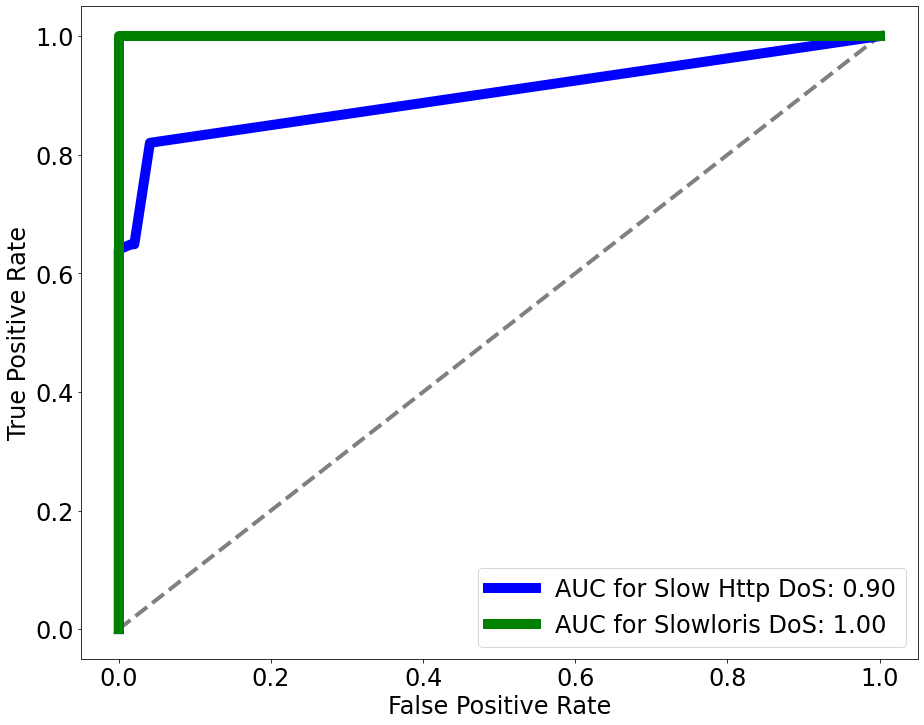

In [44]:
#Slowloris+Slow httptest DoS combined ROC graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

plt.plot([0,1], [0,1], c ='grey', linestyle = '--',linewidth = 4)

probs1 =  model2.predict_proba(X_test1)
probs2 =  model2.predict_proba(X_test2)


# Reading probability of attack
probs1 = probs1[:, 1]
probs2 = probs2[:, 1]
fpr1, tpr1, thresholds = roc_curve(Y_test1, probs1)
fpr2, tpr2, thresholds = roc_curve(Y_test2, probs2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
label1 = 'AUC for Slow Http DoS:' + ' {0:.2f}'.format(roc_auc1)
label2 = 'AUC for Slowloris DoS:' + ' {0:.2f}'.format(roc_auc2)
plt.plot(fpr1, tpr1, c = 'b', label = label1, linewidth = 10)
plt.plot(fpr2, tpr2, c = 'g', label = label2, linewidth = 10)
plt.xlabel('False Positive Rate', fontsize = 24)
plt.ylabel('True Positive Rate', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 24)
plt.show()



In [ ]:
###Fit the exported pipeline##########

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('train.csv')
features = tpot_data.drop('Label', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Label'].values, random_state=23)

# Average CV score on the training set was:0.9988887275364388
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=4, min_samples_split=20)),
    DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=10, min_samples_split=16)
)




In [33]:
from time import time
t0 = time()
exported_pipeline.fit(training_features, training_target)
tf = time() - t0
print ("The S-DTC clf trained in {} seconds".format(round(tf, 3)))

The S-DTC clf trained in 25.337 seconds


CAP %: 58.24847250509165


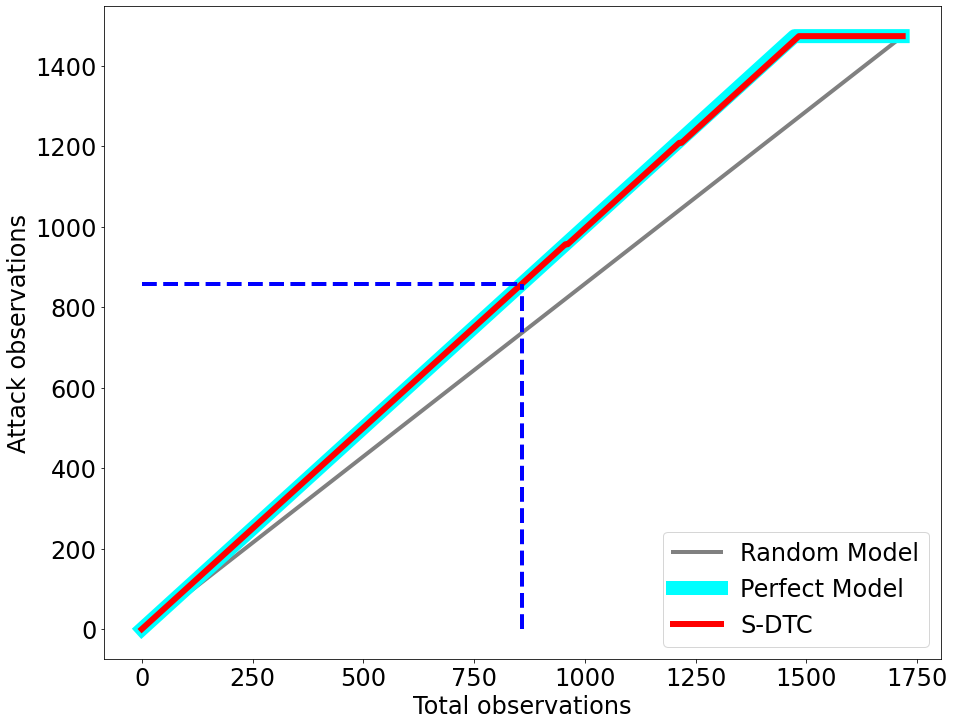

In [61]:
##############################CAP Analysis Slow httptest attack#############################
import matplotlib as mpl

mpl.rcParams['font.size'] = 24
plt.rcParams["figure.figsize"] = (15,12)
total = len(Y_test1)
#1473
class_1_count = np.sum(Y_test1)
#244
class_0_count = total - class_1_count


#plot a random model which is based on the fact that the correct detection of class 1.0 will grow linearly.
plt.plot([0, total], [0, class_1_count], c = 'grey', linestyle = '-', linewidth = 4, label = 'Random Model')

#A Perfect model is one which will detect all class 1.0 data points in the same number of tries as there are class 1.0 data points. 
#It takes exactly 1473 tries for the perfect model to identify 1473 class 1.0 data points.

plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'cyan', 
         linewidth = 14, 
         label = 'Perfect Model')

#extract the probability of class 1.0 in the variable probs
probs1= exported_pipeline.predict_proba(X_test1)
probs1= probs1[:,1]

# zip probs and y_test together. sort this zip in the reverse order of probabilities such that the maximum probability comes first 
model_y = [y for _, y in sorted(zip(probs1,Y_test1),reverse = True)]

#np.cumsum() creates an array of values while cumulatively adding all previous values in the array to the present value
#For example, if we have an array [1, 1, 1, 1, 1]. Applying cumsum would result in [1, 2, 3, 4, 5]

y_values = np.append([0], np.cumsum(model_y))

#append 0 in front of the array for the start point (0,0). The x-values will be ranging from 0 to the total + 1
#np.arrange does not include last value, so here end point=total

x_values = np.arange(0, total + 1)
plt.plot(x_values, 
         y_values, 
         c = 'red', 
         label = 'S-DTC', 
         linewidth = 6)

# Plot information
plt.xlabel('Total observations', fontsize = 24)
plt.ylabel('Attack observations', fontsize = 24)
#plt.title('Cumulative Accuracy Profile for Slow Httptest DoS', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 24)


#CAP Analysis using Plot
# Point where vertical line will cut trained model
index = int((50*total / 100))


## 50% Vertical line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='blue', linestyle = '--',linewidth = 4)

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'blue', linestyle = '--',linewidth = 4)

class_1_observed = y_values[index] * 100 / max(y_values)
print("CAP %:",class_1_observed)
plt.show()


CAP %: 95.5223880597015


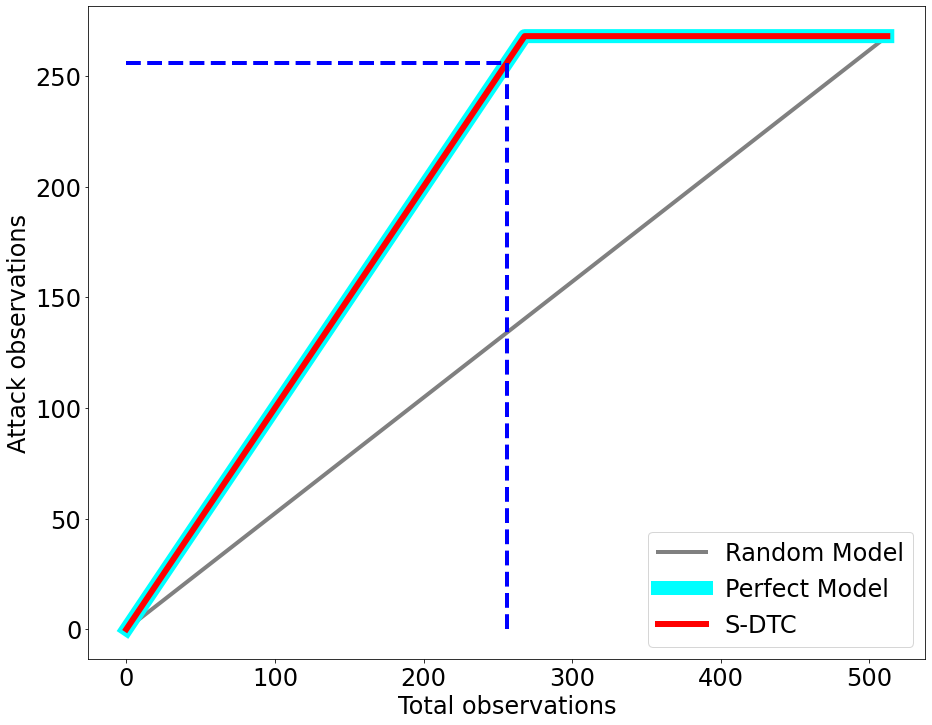

In [62]:
##############################CAP Analysis Slowloris attack#############################
mpl.rcParams['font.size'] = 24
plt.rcParams["figure.figsize"] = (15,12)
total = len(Y_test2)
#268
class_1_count = np.sum(Y_test2)
#244
class_0_count = total - class_1_count

plt.plot([0, total], [0, class_1_count], c = 'grey', linestyle = '-', linewidth = 4, label = 'Random Model')

plt.plot([0, class_1_count, total], 
         [0, class_1_count, class_1_count], 
         c = 'cyan', 
         linewidth = 14, 
         label = 'Perfect Model')


probs2= exported_pipeline.predict_proba(X_test2)
probs2= probs2[:,1]

model_y = [y for _, y in sorted(zip(probs2,Y_test2),reverse = True)]

y_values = np.append([0], np.cumsum(model_y))

x_values = np.arange(0, total + 1)
plt.plot(x_values, 
         y_values, 
         c = 'red', 
         label = 'S-DTC', 
         linewidth = 6)

# Plot information
plt.xlabel('Total observations', fontsize = 24)
plt.ylabel('Attack observations', fontsize = 24)
#plt.title('Cumulative Accuracy Profile for Slowloris DoS', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 24)


index = int((50*total / 100))

## 50% Vertical line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='blue', linestyle = '--',linewidth = 4)

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'blue', linestyle = '--',linewidth = 4)

class_1_observed = y_values[index] * 100 / max(y_values)
print("CAP %:",class_1_observed)
plt.show()

In [ ]:
#References:https://towardsdatascience.com/machine-learning-classifier-evaluation-using-roc-and-cap-curves-7db60fe6b716